<a href="https://colab.research.google.com/github/gabrielasenareis/python-basico/blob/main/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as est
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Churn.csv to Churn.csv


In [ ]:
dataset = pd.read_csv('Churn.csv')
# formato
dataset.shape

(999, 1)

In [ ]:
# o arquivo veio com um erro e todas as 12 colunas estavam em uma só, então
# vou usar o método 'split' pra fazer essa separação

# vou especificar queele não tem cabeçalho
dataset = pd.read_csv('Churn.csv', header=None)

# observei que o que separava os dados era o " ; ", então vou usar ele como separador
dataset = dataset[0].str.split(';', expand=True)

# fiz a atribuição de nomes as colunas
dataset.columns = [ "Id", 'Score', "Estado", 'Gênero', 'Idade', 'Patrimônio', 'Saldo', 'Produtos', 'TemCartCrédito', 'Ativo', 'Salário', 'Saiu']

# salvei o dataFrame com as colunas renomeadas em um novo arquivo CSV
dataset.to_csv('Churn_com_colunas.csv', index=False)

# vou verificar as primeiras linhas do dataFrame para garantir que as colunas foram separadas corretamente
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,X0,X1,X2,X3,X4,X4,X6,X7,X8,X9,X10,X11
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0


In [ ]:
# vou excluir a primeira linha que ficou com dados sem valor
dataset.drop(0, axis=0, inplace=True)
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
1,1,619,RS,Feminino,42,2,0,1,1,1,10134888,1
2,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258,0
3,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157,1
4,4,699,RS,Feminino,39,1,0,2,0,0,9382663,0
5,5,850,SC,Feminino,43,2,12551082,1,1,1,790841,0


In [ ]:
# explorando os dados categóricos
# estado

agrupado = dataset.groupby(['Estado']).size()
agrupado

# pode ser observado que existem estados que não existem, como "td" e "rp",

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

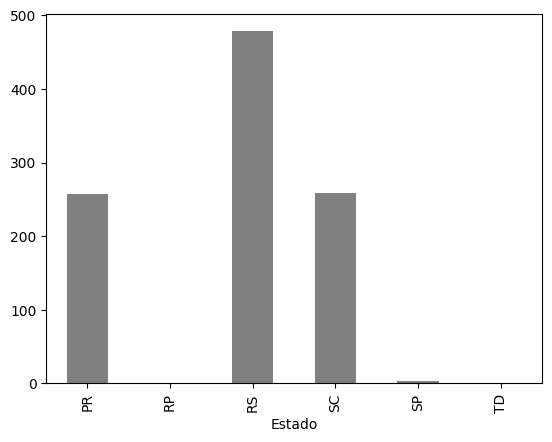

In [ ]:
# outra forma de visualizar é com gráficos
agrupado.plot.bar(color = 'gray')

In [ ]:
# genero
agrupado1 = dataset.groupby(['Gênero']).size()
agrupado1

# pode se observar que a mesma informação está com definições diferentes,
# como "fem", "f" e "feminino", além de uma informação vazia.

Gênero
               8
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

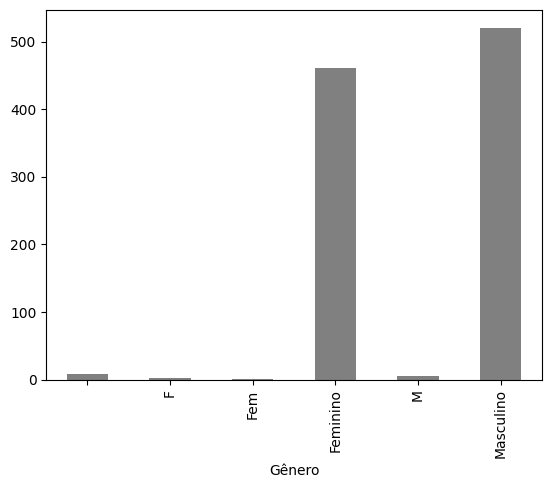

In [ ]:
# analisando agora no gráfico
agrupado1.plot.bar(color = "gray")

In [ ]:
# explorando agora os dados numéricos
# score
print(dataset['Score'].dtype)


object


In [ ]:
# os dados sa coluna "score" estão sendo lidos como strings, vamos converter
# para números
dataset['Score'] = pd.to_numeric(dataset['Score'])
print(dataset['Score'].dtype)

int64


In [ ]:
# vamos detalhar as informações sobre o score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

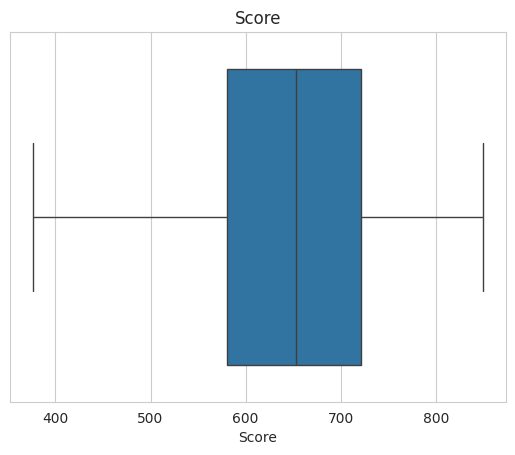

In [ ]:
# vamos observar com um gráfico boxplot

srn.boxplot(dataset['Score'], orient = "h").set_title('Score')


Text(0.5, 1.0, 'Score')

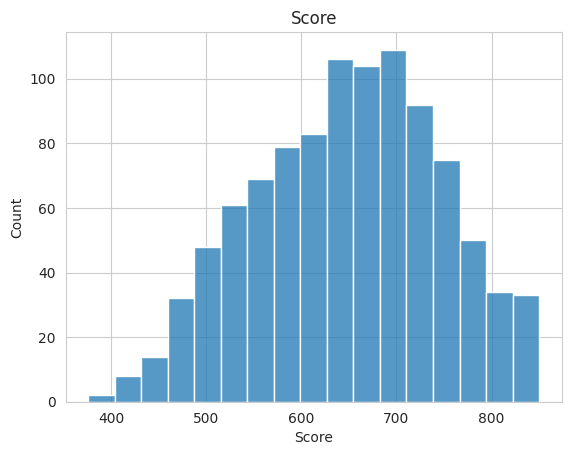

In [ ]:
# vamos visualizar agora os mesmos dados com um histograma

srn.histplot(dataset['Score']).set_title('Score')

In [ ]:
# idade
print(dataset['Idade'].dtype)

object


In [ ]:
# os dados da coluna "idade" também estão sendo lidos como strings, vamos converter

dataset['Idade'] = pd.to_numeric(dataset['Idade'])
print(dataset['Idade'].dtype)

int64


In [ ]:
# vou analisar os dados da coluna idade
dataset['Idade'].describe()

# se observa que existem valores que não se enquadram num contexto
# real de idade, como "-20" e "140"

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

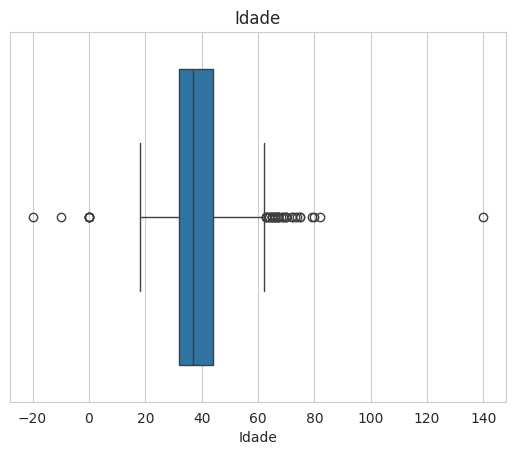

In [ ]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Idade'], orient ="h").set_title('Idade')

# os valores fora de contexto foram mostrados como outliers

Text(0.5, 1.0, 'Idade')

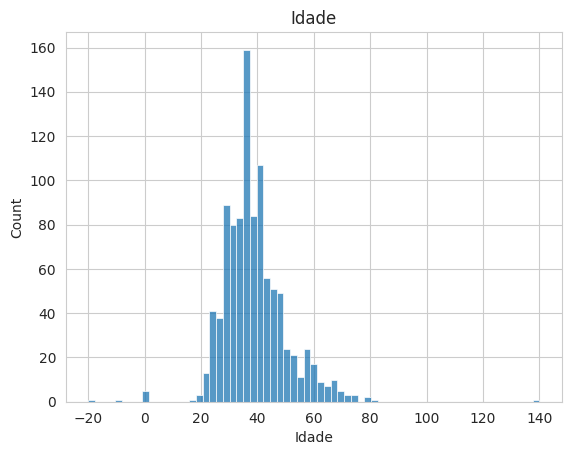

In [ ]:
# agora vamos visualizar com histograma
srn.histplot(dataset['Idade']).set_title('Idade')

In [ ]:
# vi que todas as colunas numericas estão sendo lidas como strings, então vou fazer
# a alteraçao logo em todas
converterColuna = ['Id', 'Patrimônio', 'Saldo', 'Produtos', 'TemCartCrédito', 'Ativo', 'Salário', 'Saiu']
dataset[converterColuna] = dataset[converterColuna].apply(pd.to_numeric)
# testando se funcionou
print(dataset['Id'].dtype)

int64


In [ ]:
# saldo
dataset['Saldo'].describe()

#observa-se que o primeiro quartil e o valor mínimo são iguais a 0

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

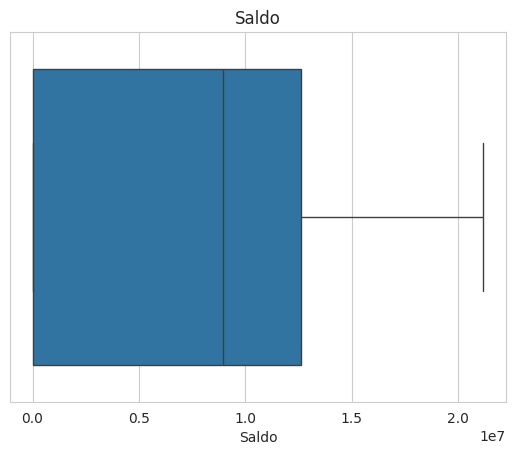

In [70]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Saldo'], orient ="h").set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

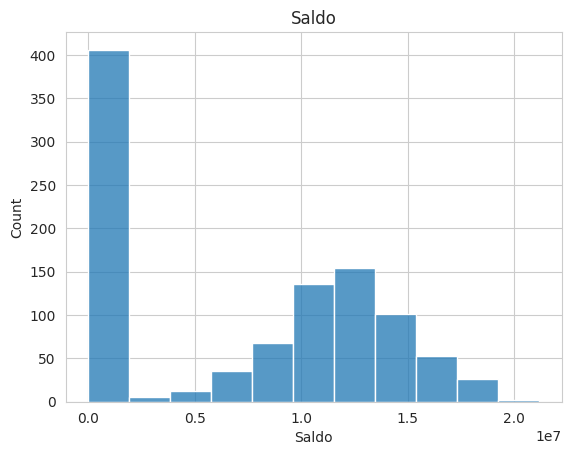

In [71]:
# vamo visualizar no histograma

srn.histplot(dataset['Saldo']).set_title('Saldo')

In [72]:
# salário
dataset['Salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

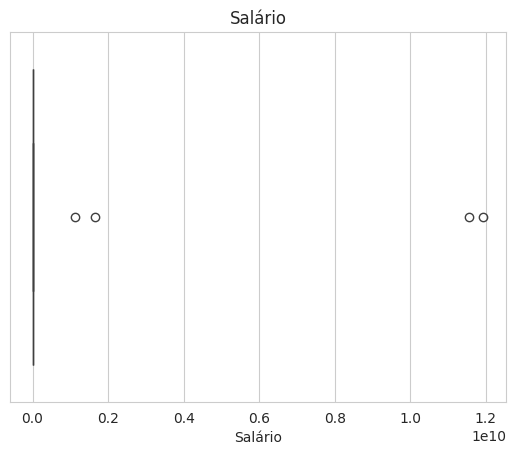

In [73]:
# vamo visualizar no boxplot

srn.boxplot(dataset['Salário'], orient ="h").set_title('Salário')

#observa-se uma grande concentração de valores no "0"

Text(0.5, 1.0, 'Salário')

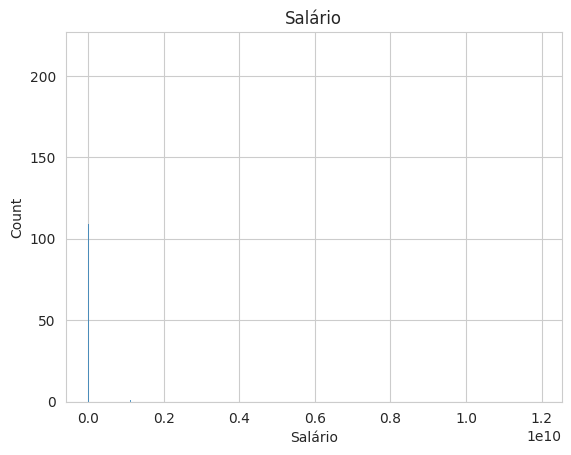

In [76]:
# vamo visualizar no histograma

srn.histplot(dataset['Salário']).set_title('Salário')

# observa-se novamente a concentração no valor 0, provavelmente
# porque os clientes não informaram os salários